# What sells a car?

I am an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. I need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import datetime as dt
import warnings

warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


### Load data

In [2]:
df = pd.read_csv('vehicles_us.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

The number of missing values is quite large

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [4]:
df.describe(include='all')


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [5]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


1) We have missing values in [model_year], [cylinders], [odometer], [paint_color], [is_4wd].

2) We have min price 1 (impossible)

3) [model_year] and [date_posted] are object type, not time.

### Conclusions and further steps

1) We can't fix missing values in `cylinders`, `paint_color` because this is individual parameters. Maybe there are some depends with other columns, need check it. Missing values in `is_4wd` we can fill with 0. However, need to remember, that if this parameter is important for our analysis - need to ask managers is "NaN"=not 4wd or not.

2) Values in `model_year` and `odometer` we can fill in using the median of the values grouped by model and condition. It won't be very accurate but it's better than nothing, because we need this columns.

3) Need to decide what price is outliers

4) We can change the data type of the columns

In [6]:
df.paint_color = df.paint_color.fillna('unknown')

In [7]:
print(df.paint_color.value_counts())
print()
print(df.paint_color.isna().sum())

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

0


In [8]:
df['model_year'] = df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))

In [9]:
df['model_year'].isna().sum()

0

In [10]:
df['cylinders'] = df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'))

In [11]:
df['cylinders'].isna().sum()

0

In [12]:
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year', 'condition'])['odometer'].transform('median'))
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,NaN,2018-12-15,18
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,unknown,NaN,2018-11-03,41
31806,1700,1996.0,ford mustang,salvage,6.0,gas,NaN,manual,convertible,white,NaN,2019-03-31,46
33257,4500,1963.0,chevrolet impala,fair,6.0,gas,NaN,automatic,sedan,unknown,NaN,2019-03-17,38
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,NaN,2018-06-24,25
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59
46911,22300,2003.0,chevrolet corvette,new,8.0,gas,NaN,manual,convertible,black,NaN,2018-11-08,23


In [13]:
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year', 'type'])['odometer'].transform('median'))
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,NaN,2018-12-15,18
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,unknown,NaN,2018-11-03,41
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


In [14]:
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year'])['odometer'].transform('median'))
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


I will delete this unique model

In [15]:
df.iloc[45694]

price                18000
model_year          1929.0
model           ford f-150
condition             good
cylinders              8.0
fuel                   gas
odometer               NaN
transmission        manual
type                 other
paint_color         silver
is_4wd                 NaN
date_posted     2018-11-18
days_listed             59
Name: 45694, dtype: object

In [16]:
df = df.drop(45694)
df.iloc[45694]

price                    5900
model_year             2003.0
model           toyota tacoma
condition                good
cylinders                 6.0
fuel                      gas
odometer             195000.0
transmission        automatic
type                   pickup
paint_color             white
is_4wd                    NaN
date_posted        2018-12-18
days_listed                10
Name: 45695, dtype: object

In [17]:
df['is_4wd'] = df['is_4wd'].fillna(0)
display(df)
print()
print(df['is_4wd'].isna().sum())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71



0


## Fix data types

In [18]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  float64       
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  float64       
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  float64       
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.5+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [19]:
df['cylinders'] = df['cylinders'].astype('int')
df['model_year'] = df['model_year'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  int32         
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  int32         
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  float64       
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(6)
memory usage: 5.1+ MB


As a result, we have data without missing values and with the correct types.

## Enrich data

Add datetime values for when the ad was placed

In [20]:
df['weekday_posted'] = pd.to_datetime(df['date_posted']).dt.weekday
df['month_posted'] = pd.to_datetime(df['date_posted']).dt.month
df['year_posted'] = pd.to_datetime(df['date_posted']).dt.year
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51524 non-null  int64         
 1   model_year      51524 non-null  int32         
 2   model           51524 non-null  object        
 3   condition       51524 non-null  object        
 4   cylinders       51524 non-null  int32         
 5   fuel            51524 non-null  object        
 6   odometer        51524 non-null  float64       
 7   transmission    51524 non-null  object        
 8   type            51524 non-null  object        
 9   paint_color     51524 non-null  object        
 10  is_4wd          51524 non-null  float64       
 11  date_posted     51524 non-null  datetime64[ns]
 12  days_listed     51524 non-null  int64         
 13  weekday_posted  51524 non-null  int64         
 14  month_posted    51524 non-null  int64         
 15  ye

Add the vehicle's age when the ad was placed

In [21]:
df['age_when_posted'] = (df['year_posted'] - df['model_year']).astype(int) + 1
df


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7
3,1500,2003,ford f-150,fair,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6


Add the vehicle's average mileage per year

In [22]:
df['mileage_per_year'] = df['odometer'] / df['age_when_posted']
display(df)
df.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17,11402.941176
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
count,51524.00000,51524.000000,51524,51524,51524.000000,51524,51524.000000,51524,51524,51524,51524.000000,51524,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,13,NaN,354,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2795,24773,NaN,47287,NaN,46902,12405,10029,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,12132.35104,2009.795125,NaN,NaN,6.121031,NaN,115234.815571,NaN,NaN,NaN,0.496312,NaN,39.554382,3.005376,6.628406,2018.307468,9.512344,14510.977369
std,10040.86718,6.089046,NaN,NaN,1.657452,NaN,62209.897308,NaN,NaN,NaN,0.499991,NaN,28.204413,1.997735,3.474115,0.461450,6.102743,8640.370871
min,1.00000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.00000,2007.000000,NaN,NaN,4.000000,NaN,73159.000000,NaN,NaN,NaN,0.000000,NaN,19.000000,1.000000,3.000000,2018.000000,5.000000,9800.000000


It might help to replace the condition values with something that can be manipulated more easily (dict)

In [23]:
print(df['condition'].unique())
condition_dict={
    'new':5,
    'like new':4,
    'excellent':3,
    'good':2,
    'fair':1,
    'salvage':0
}
print(condition_dict.keys())
print(condition_dict.values())
df['condition_id']=df['condition'].apply(lambda x: condition_dict[x])
#to make column condition_id right after condition:
cols = df.columns.tolist()
cols = cols[0:4] + cols[-1:] + cols[4:-1]
df = df[cols]
df

['good' 'like new' 'fair' 'excellent' 'salvage' 'new']
dict_keys(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'])
dict_values([5, 4, 3, 2, 1, 0])


,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,2,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,1,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17,11402.941176
4,14900,2017,chrysler 200,excellent,3,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,4,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,0,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,3,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,2,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


## Check clean data

General/summary information about the DataFrame

In [24]:
display(df)
df.describe(include='all')


,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,2,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,1,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17,11402.941176
4,14900,2017,chrysler 200,excellent,3,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,4,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,0,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,3,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,2,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
count,51524.00000,51524.000000,51524,51524,51524.000000,51524.000000,51524,51524.000000,51524,51524,51524,51524.000000,51524,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000
unique,NaN,NaN,100,6,NaN,NaN,5,NaN,3,13,13,NaN,354,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ford f-150,excellent,NaN,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2795,24773,NaN,NaN,47287,NaN,46902,12405,10029,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,12132.35104,2009.795125,NaN,NaN,2.637548,6.121031,NaN,115234.815571,NaN,NaN,NaN,0.496312,NaN,39.554382,3.005376,6.628406,2018.307468,9.512344,14510.977369
std,10040.86718,6.089046,NaN,NaN,0.712449,1.657452,NaN,62209.897308,NaN,NaN,NaN,0.499991,NaN,28.204413,1.997735,3.474115,0.461450,6.102743,8640.370871
min,1.00000,1908.000000,NaN,NaN,0.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.00000,2007.000000,NaN,NaN,2.000000,4.000000,NaN,73159.000000,NaN,NaN,NaN,0.000000,NaN,19.000000,1.000000,3.000000,2018.000000,5.000000,9800.000000


In [25]:
df.sample(5)



,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
7441,5200,2008,honda civic,excellent,3,4,gas,64000.0,automatic,coupe,brown,0.0,2018-10-01,16,0,10,2018,11,5818.181818
45313,2599,2014,honda cr-v,like new,4,4,gas,37539.0,automatic,SUV,grey,1.0,2018-12-21,88,4,12,2018,5,7507.800000
42645,19800,2016,chevrolet silverado 1500,excellent,3,6,gas,93391.0,automatic,pickup,white,1.0,2018-09-13,47,3,9,2018,3,31130.333333
27965,30800,2016,chevrolet silverado 1500 crew,good,2,8,gas,89998.0,automatic,pickup,black,1.0,2018-05-26,44,5,5,2018,3,29999.333333
11863,1,2013,chevrolet camaro,excellent,3,10,gas,28926.0,other,coupe,grey,1.0,2018-07-09,101,0,7,2018,6,4821.000000


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

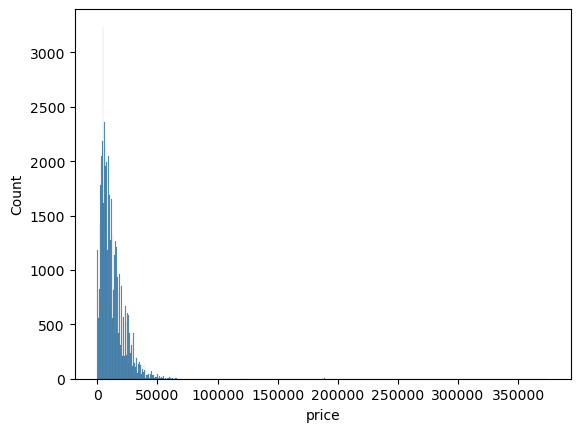

In [26]:
sns.histplot(data=df, x='price')
plt.show()

Very big tail on the right, so there are a lot of outliers on the right

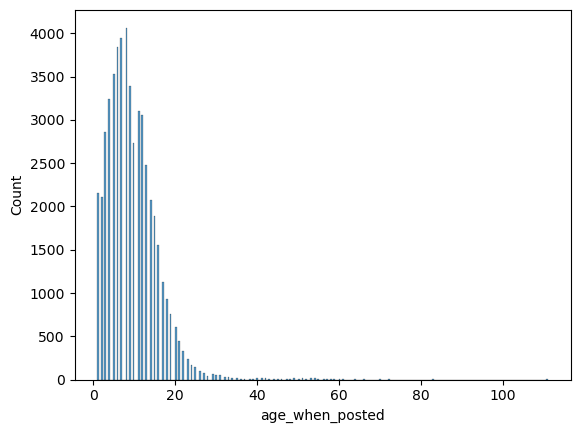

In [27]:
sns.histplot(data=df, x='age_when_posted')
plt.show()

Not so big tail on the right, but still there are a lot of outliers on the right

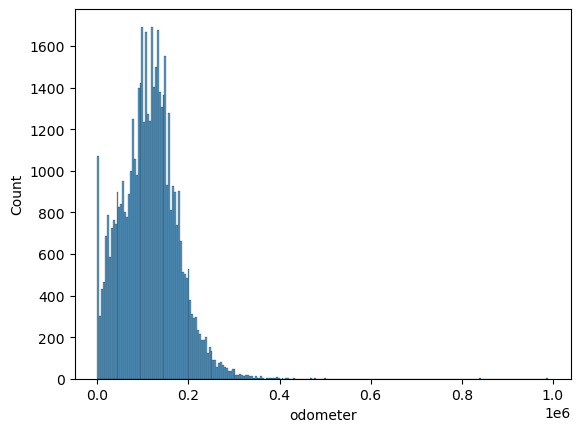

In [28]:
sns.histplot(data=df, x='odometer')
plt.show()

There is tail on the right too

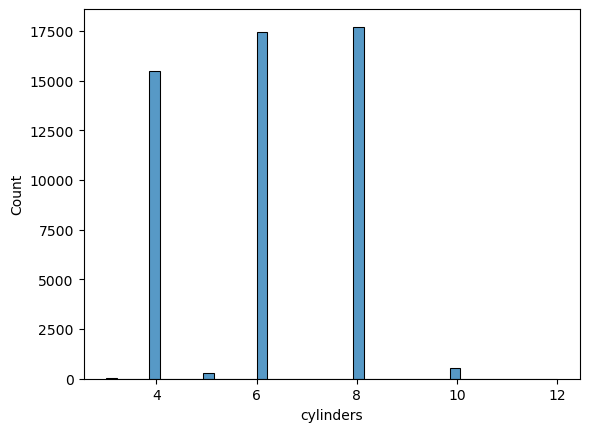

In [29]:
sns.histplot(data=df, x='cylinders')
plt.show()

Here we see 3 parameters with big values (4,6,8), and other we almost don't see

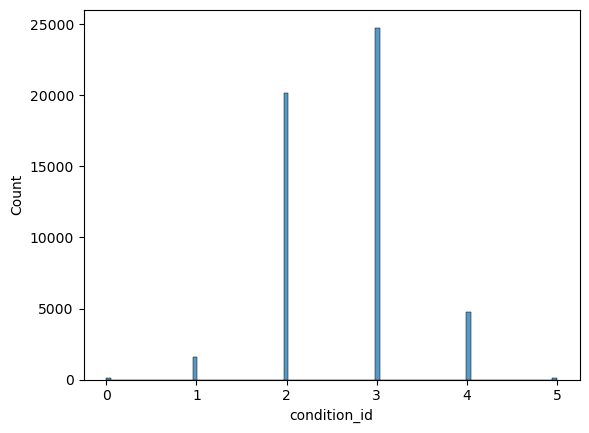

In [30]:
sns.histplot(data=df, x='condition_id')
plt.show()

Here we see very few count of values of 1 and 5

Summary:

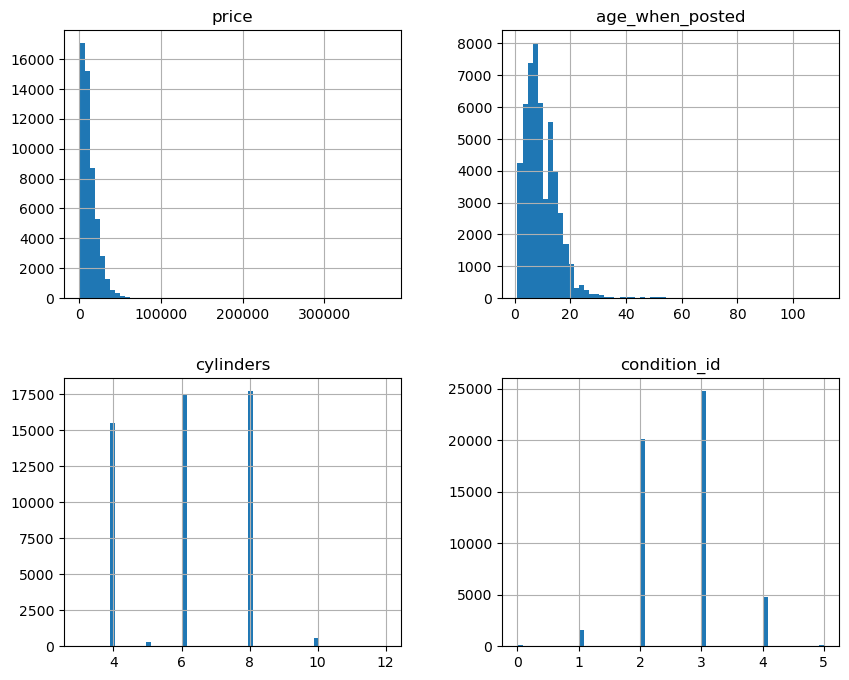

In [31]:
df.hist(column=['price', 'age_when_posted', 'cylinders', 'condition_id'], figsize=(10,8),bins=60);

## Study and treat outliers


Function to determine outliers:

In [32]:
def distribution_percentile(parameter):
    print('The histogram of: {}'.format(parameter))
    df[parameter].hist()
    plt.show()
    if df[parameter].mean()>df[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(df[parameter].describe())
    ninety_nine = np.percentile(df[parameter], 99)
    three = np.percentile(df[parameter], 3)
    print('---------------------------------------')
    print('min border:',three)
    print('max border:',ninety_nine)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_nine)
    print('We have',len(df[(df[parameter]<three)|(df[parameter]>ninety_nine)]),"values that we can consider outliers")

The histogram of: price


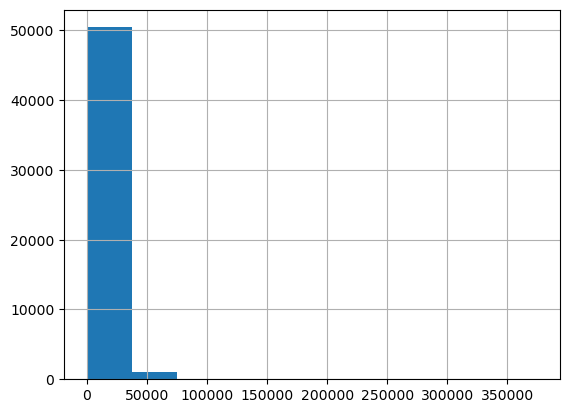

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64
---------------------------------------
min border: 1000.0
max border: 43995.0
---------------------------------------
The outliers are considered to be values below 1000.0 and above 43995.0
We have 1919 values that we can consider outliers


In [33]:
distribution_percentile('price')

The histogram of: age_when_posted


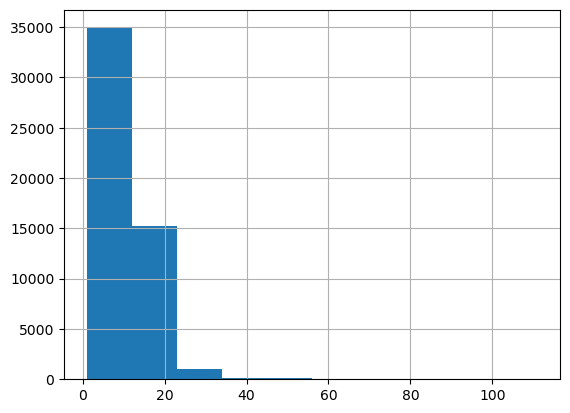

The distribution is skewed to the right
---------------------------------------
Statistics on: age_when_posted
count    51524.000000
mean         9.512344
std          6.102743
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: age_when_posted, dtype: float64
---------------------------------------
min border: 1.0
max border: 28.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 28.0
We have 511 values that we can consider outliers


In [34]:
distribution_percentile('age_when_posted')

The histogram of: mileage_per_year


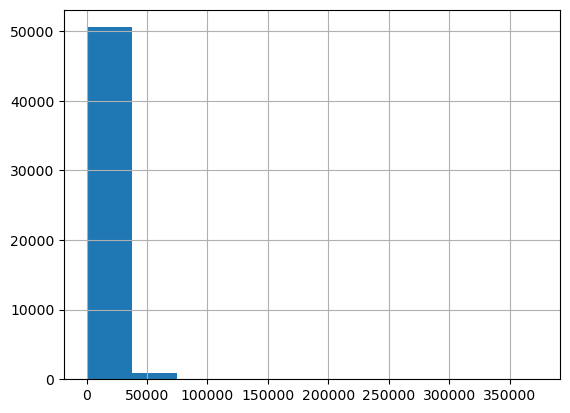

The distribution is skewed to the right
---------------------------------------
Statistics on: mileage_per_year
count     51524.000000
mean      14510.977369
std        8640.370871
min           0.000000
25%        9800.000000
50%       13309.605556
75%       17733.700000
max      373200.000000
Name: mileage_per_year, dtype: float64
---------------------------------------
min border: 2310.8333333333335
max border: 43307.0
---------------------------------------
The outliers are considered to be values below 2310.8333333333335 and above 43307.0
We have 2058 values that we can consider outliers


In [35]:
distribution_percentile('mileage_per_year')

1) For `price` we have:

min border: 1000.0

max border: 43995.0

1919 rows as outliers, delete just 4% of data (3% lower and 1% upper values of data)

2) For `age_when_posted` we have:

min border: 0.0

max border: 28.0

We can't delete '1' values, because we have 'new' condition.

3) For `mileage_per_year` we have:

min border: 0.0

max border: 43307.0

We can't delete values lower than 2310.8333333333335, because we have 'new' condition, that means we can have 0 on odometer in this type of vehicles.

    Store data without outliers in a separate DataFrame

In [36]:
filter_outliers = (df['price']>=1000.0)&(df['price']<=43995.0)&(df['age_when_posted']<=28.0)&(df['mileage_per_year']<=43307.0)
df_without_outliers = df[filter_outliers]
display(df_without_outliers.info())
df_without_outliers.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48650 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             48650 non-null  int64         
 1   model_year        48650 non-null  int32         
 2   model             48650 non-null  object        
 3   condition         48650 non-null  object        
 4   condition_id      48650 non-null  int64         
 5   cylinders         48650 non-null  int32         
 6   fuel              48650 non-null  object        
 7   odometer          48650 non-null  float64       
 8   transmission      48650 non-null  object        
 9   type              48650 non-null  object        
 10  paint_color       48650 non-null  object        
 11  is_4wd            48650 non-null  float64       
 12  date_posted       48650 non-null  datetime64[ns]
 13  days_listed       48650 non-null  int64         
 14  weekday_posted    4865

None

,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
count,48650.000000,48650.000000,48650,48650,48650.000000,48650.000000,48650,48650.000000,48650,48650,48650,48650.000000,48650,48650.000000,48650.000000,48650.000000,48650.000000,48650.000000,48650.000000
unique,NaN,NaN,100,6,NaN,NaN,5,NaN,3,13,13,NaN,354,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ford f-150,excellent,NaN,NaN,gas,NaN,automatic,SUV,white,NaN,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2643,23095,NaN,NaN,44765,NaN,44618,11800,9395,NaN,177,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,11966.730319,2009.899753,NaN,NaN,2.630997,6.078520,NaN,116944.924913,NaN,NaN,NaN,0.491223,NaN,39.563392,3.002220,6.612847,2018.309394,9.409640,14190.930073
std,8551.268731,5.164594,NaN,NaN,0.702457,1.633342,NaN,59734.671249,NaN,NaN,NaN,0.499928,NaN,28.234060,1.994946,3.476413,0.462248,5.175827,6786.048886
min,1000.000000,1991.000000,NaN,NaN,0.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5477.000000,2007.000000,NaN,NaN,2.000000,4.000000,NaN,77000.000000,NaN,NaN,NaN,0.000000,NaN,19.000000,1.000000,3.000000,2018.000000,5.000000,9916.666667


## Study core parameters without outliers

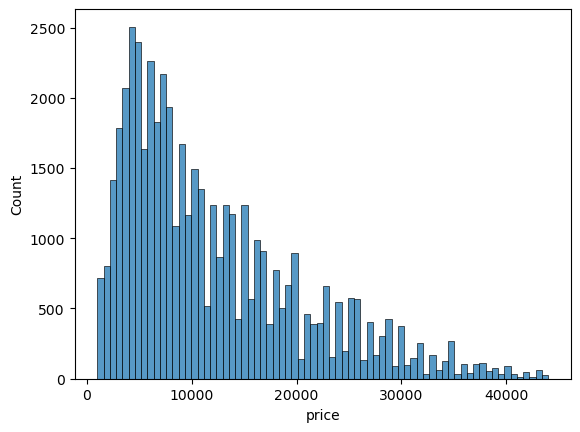

In [37]:
sns.histplot(data=df_without_outliers, x='price')
plt.show()

The distribution is still skewed to the right, but now we can see more details.

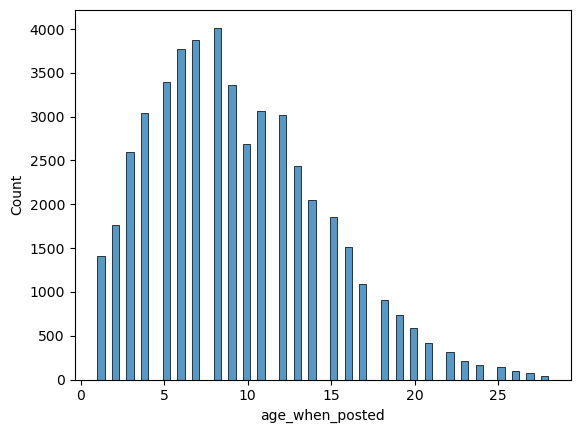

In [38]:
sns.histplot(data=df_without_outliers, x='age_when_posted')
plt.show()

The distribution is still skewed to the right, but now we can see more details too.

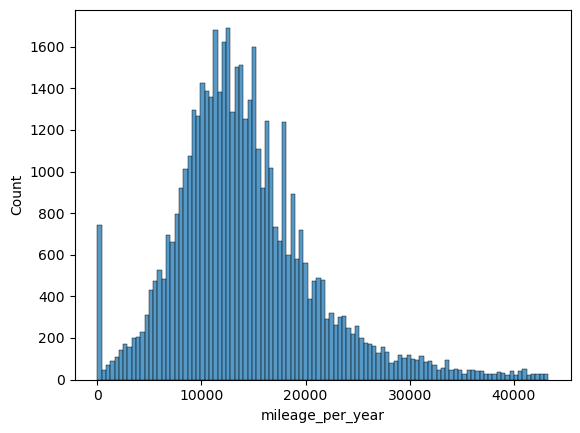

In [39]:
sns.histplot(data=df_without_outliers, x='mileage_per_year')
plt.show()

Here we see almost normal distribution, with peak on 0 (new cars).

And on all 3 histograms we see now, that outliers not very influence on data.

## Ads lifetime

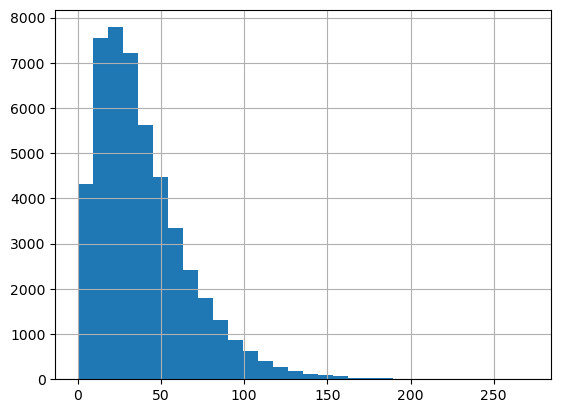

In [40]:
df_without_outliers['days_listed'].hist(bins=30)
plt.show()

In [41]:
df_without_outliers['days_listed'].describe()

count    48650.000000
mean        39.563392
std         28.234060
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Typical lifetime of an ad is 33 days, or near 1 month.

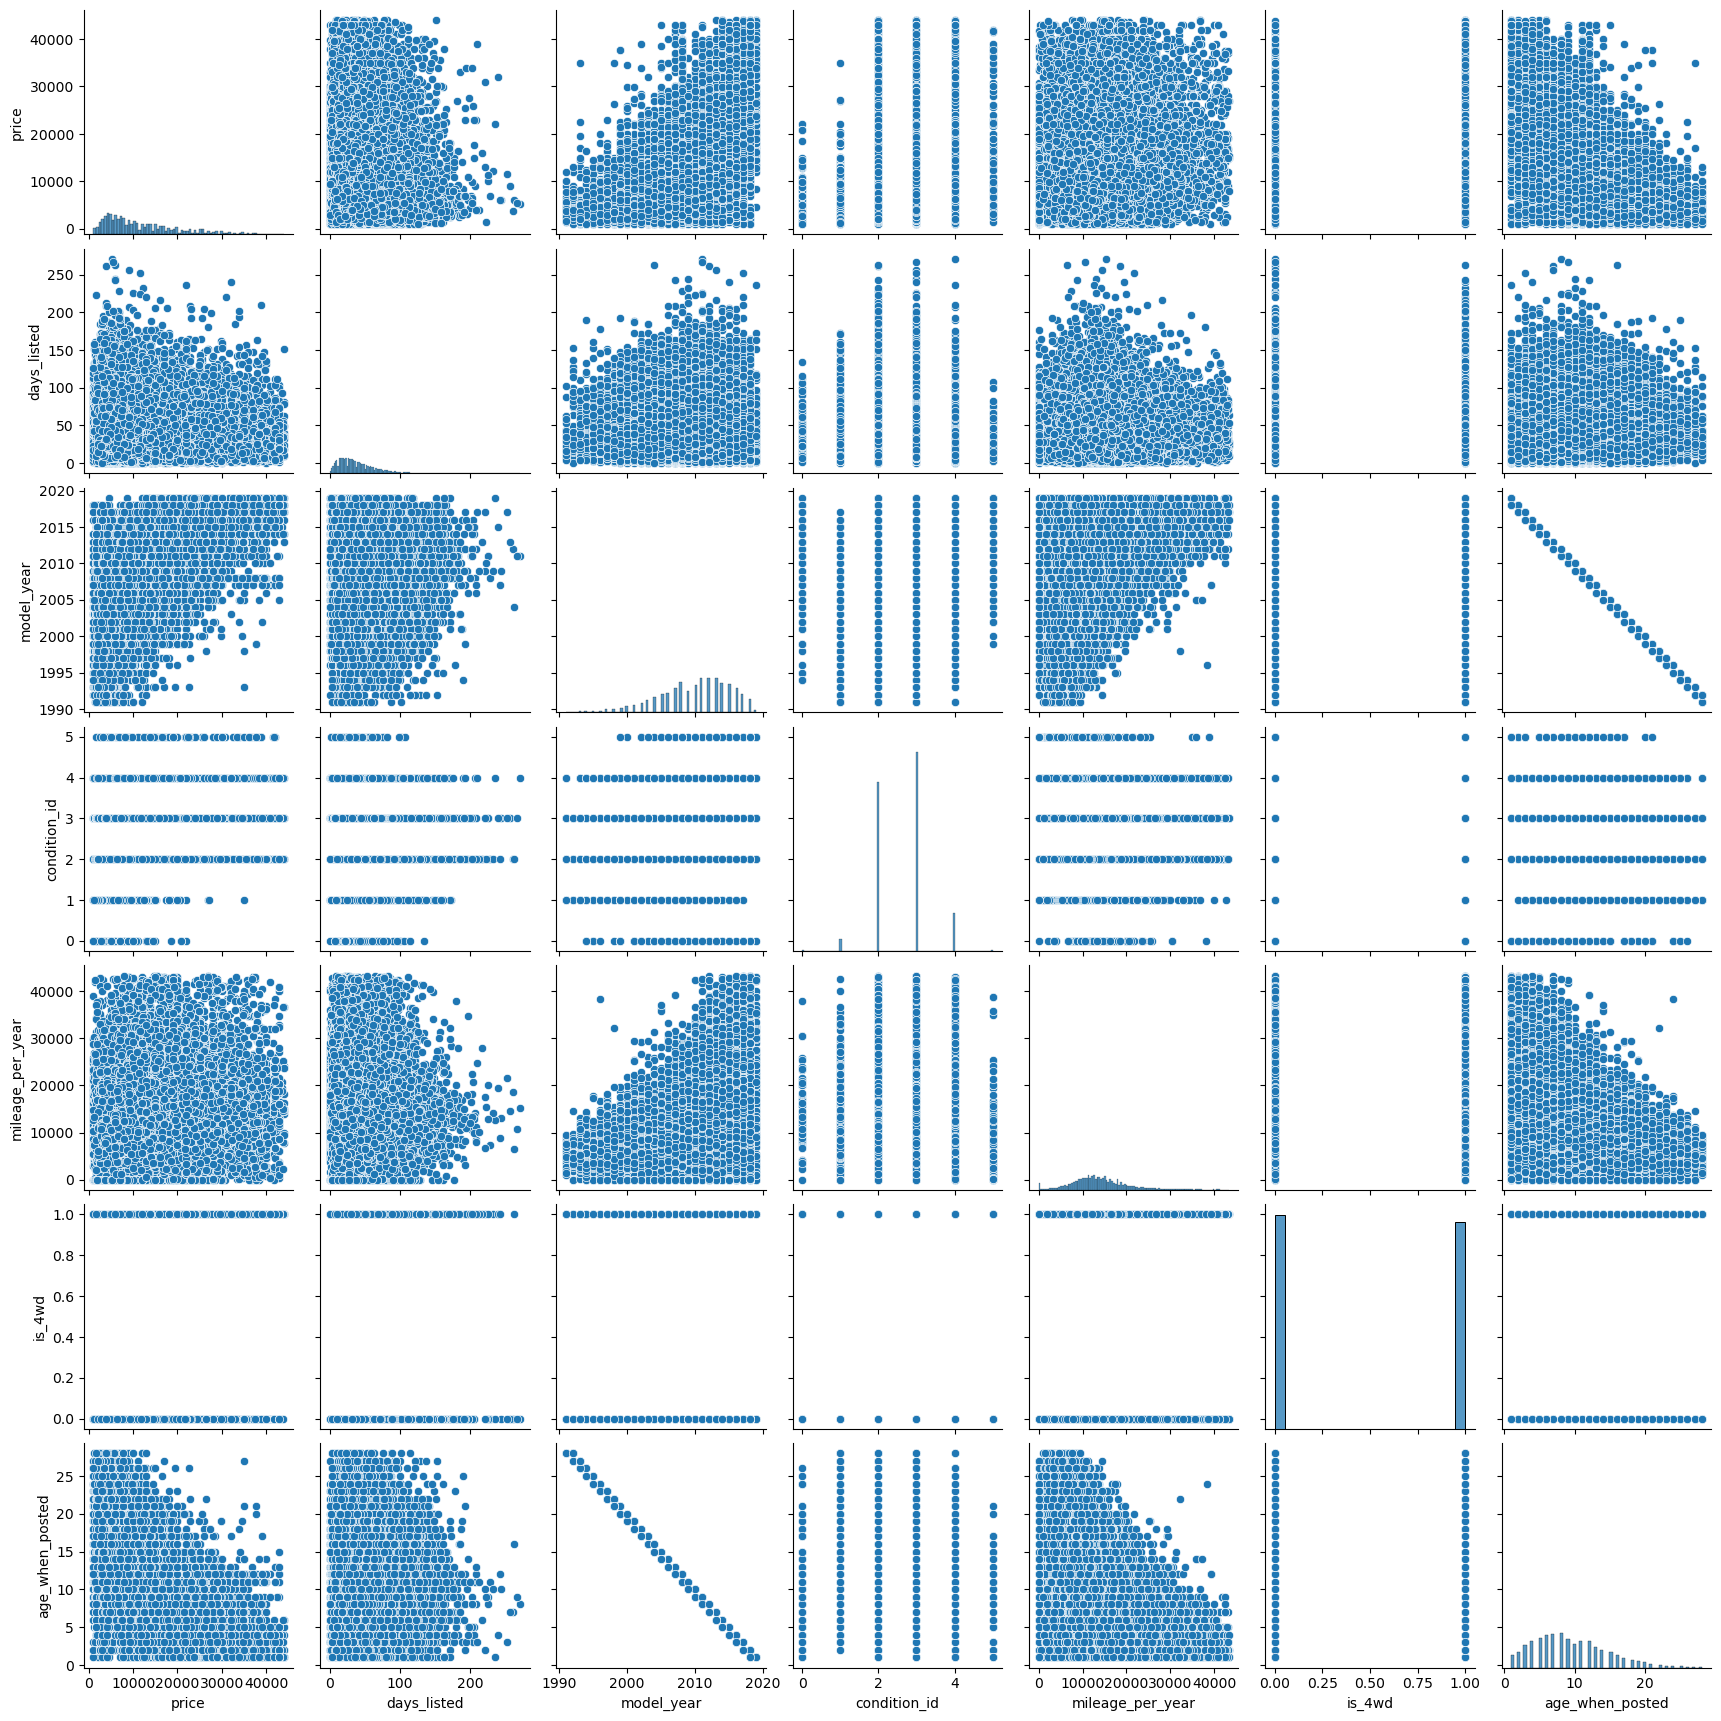

In [42]:
sns.pairplot(df_without_outliers[['price', 'days_listed', 'model_year', 'condition_id', 'mileage_per_year', 'is_4wd', 'age_when_posted']])
plt.show()

I don't see a strong relationship between `days_listed` and some other column.
Maybe in very long days listed we can see some trends: more price - less days listed (because trend down), younger - more days listed (because trend up with model year and trend down with age when posted), less days listed new cars and condition salvage (kind of normal destr with condition_id)

## Average price per each type of vehicle

In [43]:
type_df = df_without_outliers.pivot_table(index='type', values='price', aggfunc=('mean', 'count', 'median')).sort_values(by='count', ascending=False).reset_index()
type_df

,type,count,mean,median
0,SUV,11800,11150.364068,8992.0
1,sedan,11598,7152.925246,6000.0
2,truck,11527,16262.188601,14995.0
3,pickup,6691,15665.986848,14000.0
4,coupe,2011,14331.218299,13990.0
5,wagon,1503,9191.588157,7950.0
6,mini-van,1131,8040.634836,6495.0
7,hatchback,988,6988.300607,5995.0
8,van,585,10780.852991,7995.0
9,convertible,359,13079.855153,12500.0


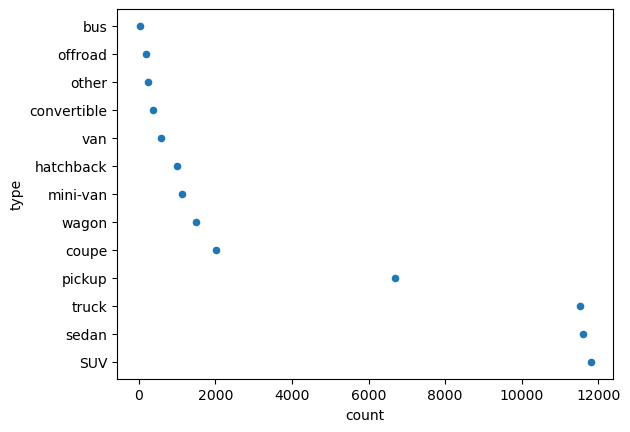

In [44]:
type_df.plot(x='count', y='type', kind='scatter')
plt.show()

Two types with the greatest number of ads - SUV ans sedan, but truck is near too.

## Price factors

Make 3 separate df's for each of top types (SUV, sedan, truck)

In [45]:
df_suv = df_without_outliers[df_without_outliers['type']=='SUV']
display(df_suv)
print('--------------------------------------')
df_sedan = df_without_outliers[df_without_outliers['type']=='sedan']
display(df_sedan)
print('--------------------------------------')
df_truck = df_without_outliers[df_without_outliers['type']=='truck']
display(df_truck)

,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
7,15990,2013,honda pilot,excellent,3,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,0,1,2019,7,15639.000000
8,11500,2012,kia sorento,excellent,3,4,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,0,7,2018,7,14882.000000
9,9200,2008,honda pilot,excellent,3,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,4,2,2019,12,12265.916667
14,12990,2009,gmc yukon,excellent,3,8,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24,3,1,2019,11,12025.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,good,2,6,gas,144500.0,automatic,SUV,unknown,1.0,2019-03-05,1,1,3,2019,8,18062.500000
51496,4999,2002,toyota 4runner,excellent,3,6,gas,177901.0,automatic,SUV,unknown,1.0,2018-05-26,59,5,5,2018,17,10464.764706
51500,6995,2012,buick enclave,excellent,3,6,gas,157000.0,automatic,SUV,white,1.0,2018-08-04,17,5,8,2018,7,22428.571429
51502,7995,2011,chevrolet equinox,like new,4,4,gas,111088.0,automatic,SUV,unknown,0.0,2019-04-01,175,0,4,2019,9,12343.111111


--------------------------------------


,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
2,5500,2013,hyundai sonata,like new,4,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
4,14900,2017,chrysler 200,excellent,3,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
5,14990,2014,chrysler 300,excellent,3,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,5,11590.800000
6,12990,2015,toyota camry,excellent,3,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,12,2018,4,19803.000000
11,8990,2012,honda accord,excellent,3,4,gas,111142.0,automatic,sedan,grey,0.0,2019-03-28,29,3,3,2019,8,13892.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,4,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,0,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,3,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,2,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


--------------------------------------


,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
22,7500,2004,chevrolet silverado,like new,4,8,gas,180000.0,automatic,truck,red,1.0,2019-01-05,64,5,1,2019,16,11250.000000
39,8000,2009,ford f-150,good,2,8,gas,234000.0,automatic,truck,black,1.0,2019-03-31,1,6,3,2019,11,21272.727273
50,6200,2006,ford f-150,excellent,3,6,gas,69698.0,automatic,truck,custom,0.0,2018-05-03,50,3,5,2018,13,5361.384615
53,10400,2012,chevrolet colorado,excellent,3,5,gas,111871.0,automatic,truck,red,1.0,2019-01-30,27,2,1,2019,8,13983.875000
60,13000,2005,ram 1500,good,2,8,gas,146000.0,automatic,truck,grey,1.0,2019-03-14,26,3,3,2019,15,9733.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51487,1495,2011,ford f-150,fair,1,6,gas,15804.0,manual,truck,white,1.0,2018-09-18,56,1,9,2018,8,1975.500000
51488,21900,2013,chevrolet silverado 3500hd,excellent,3,8,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37,3,12,2018,6,33833.333333
51497,2995,2001,ford f150,good,2,8,gas,206257.0,automatic,truck,red,0.0,2018-12-02,12,6,12,2018,18,11458.722222
51498,15900,2011,gmc sierra 1500,excellent,3,8,gas,119339.0,automatic,truck,unknown,1.0,2019-01-25,69,4,1,2019,9,13259.888889


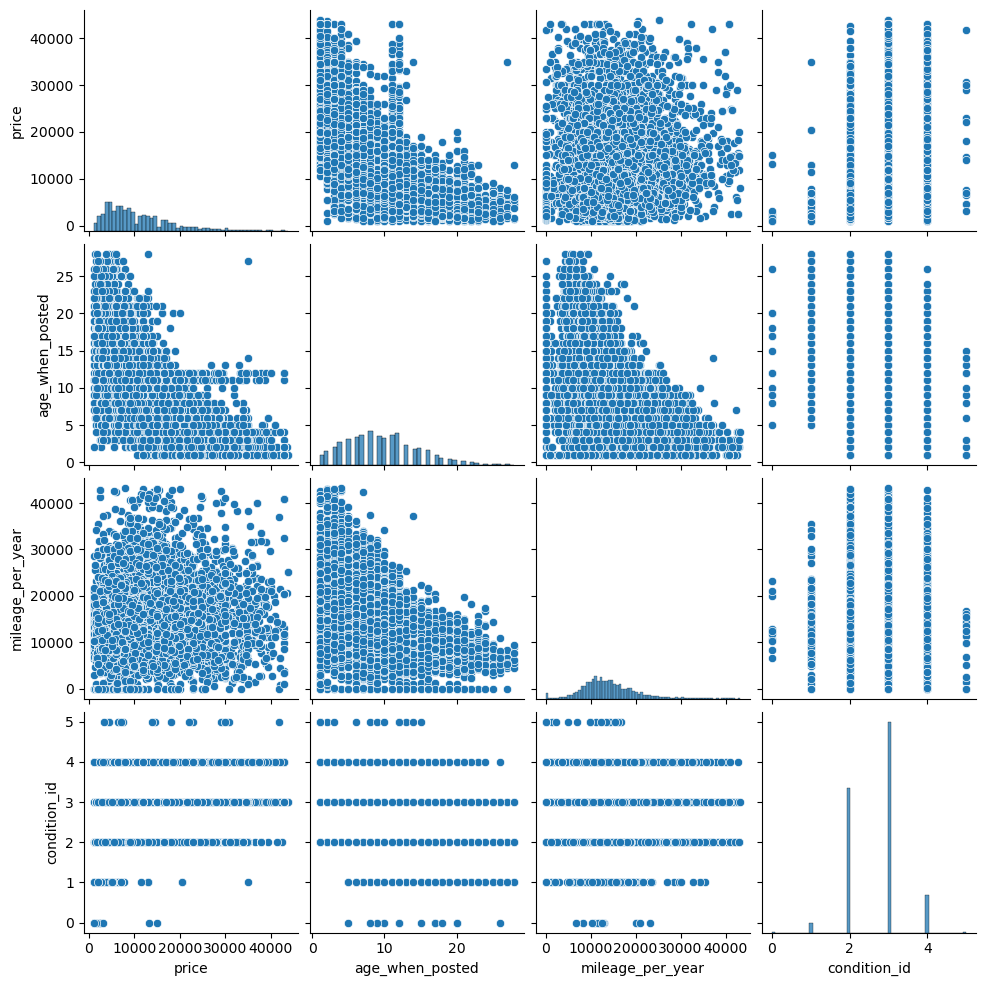

In [46]:
sns.pairplot(df_suv[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']])
plt.show()

In [47]:
df_suv[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']].corr()

,price,age_when_posted,mileage_per_year,condition_id
price,1.000000,-0.643265,0.203029,0.300495
age_when_posted,-0.643265,1.000000,-0.518149,-0.309527
mileage_per_year,0.203029,-0.518149,1.000000,0.008519
condition_id,0.300495,-0.309527,0.008519,1.000000


The biggest influence on the price is the age of the car (`age_when_posted` has -0.64 corr, that means more age - less price).

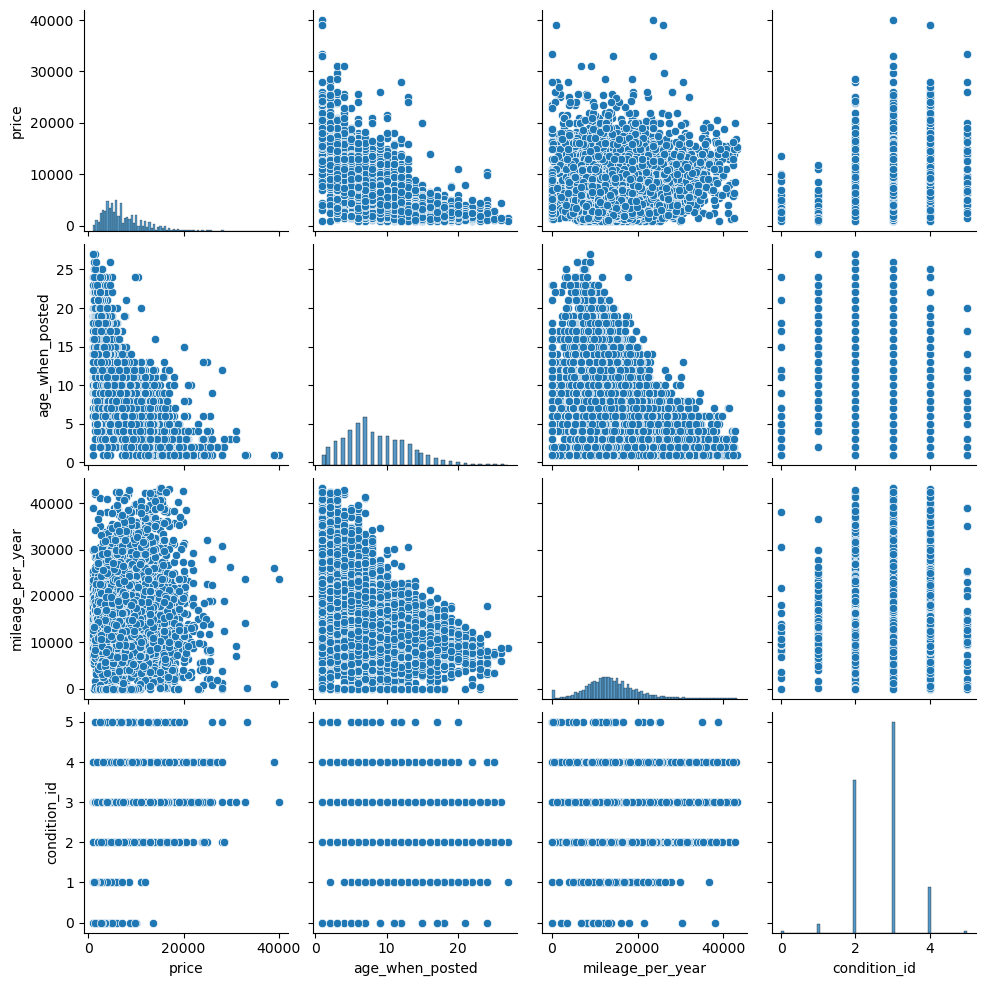

In [48]:
sns.pairplot(df_sedan[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']])
plt.show()

In [49]:
df_sedan[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']].corr()

,price,age_when_posted,mileage_per_year,condition_id
price,1.000000,-0.677823,0.147835,0.318870
age_when_posted,-0.677823,1.000000,-0.456541,-0.274654
mileage_per_year,0.147835,-0.456541,1.000000,-0.018276
condition_id,0.318870,-0.274654,-0.018276,1.000000


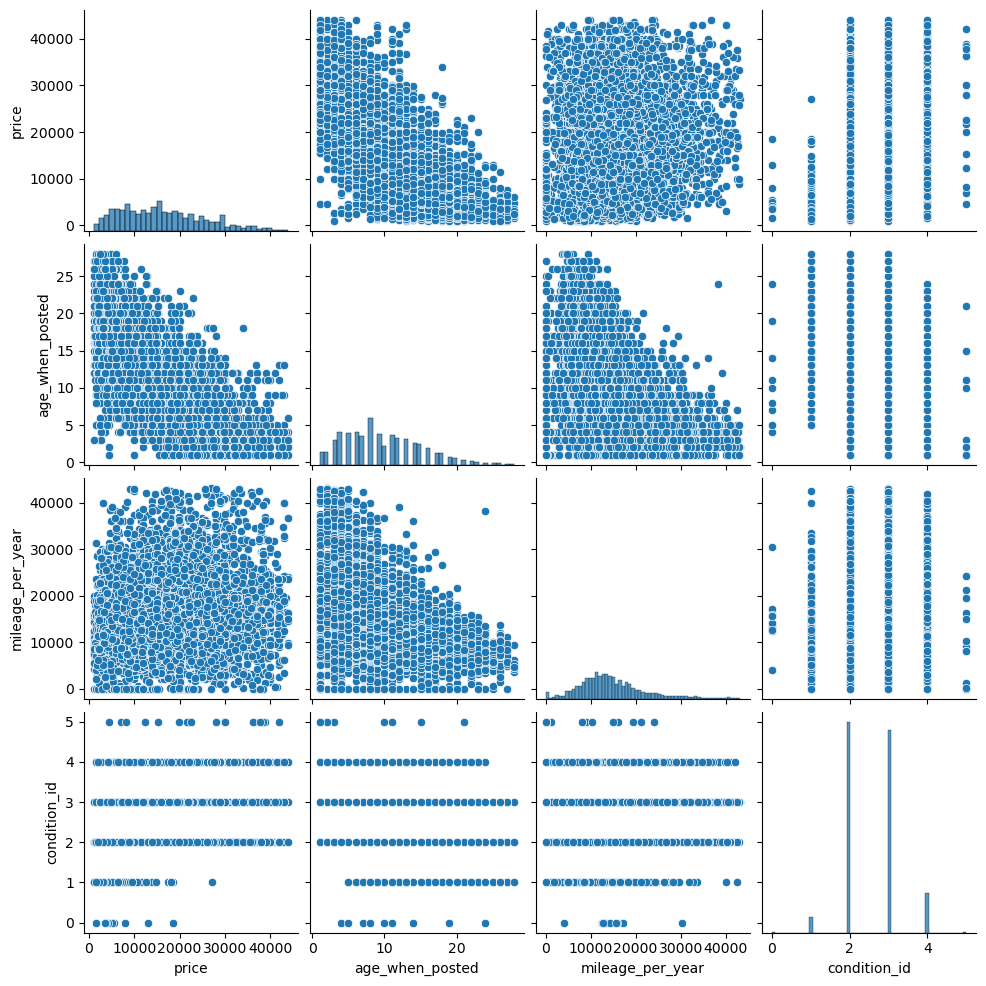

In [50]:
sns.pairplot(df_truck[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']])
plt.show()

In [51]:
df_truck[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']].corr()

,price,age_when_posted,mileage_per_year,condition_id
price,1.000000,-0.708364,0.220602,0.362903
age_when_posted,-0.708364,1.000000,-0.496238,-0.320465
mileage_per_year,0.220602,-0.496238,1.000000,0.014069
condition_id,0.362903,-0.320465,0.014069,1.000000


Sedans and trucks have the same corr's.

In [52]:
print(df_suv['transmission'].value_counts())
print('-------------')
print(df_sedan['transmission'].value_counts())
print('-------------')
print(df_truck['transmission'].value_counts())
print('-------------')
print('-------------')
print(df_suv['paint_color'].value_counts())
print('-------------')
print(df_sedan['paint_color'].value_counts())
print('-------------')
print(df_truck['paint_color'].value_counts())
print('-------------')

automatic    11230
manual         477
other           93
Name: transmission, dtype: int64
-------------
automatic    10962
manual         562
other           74
Name: transmission, dtype: int64
-------------
automatic    11032
manual         418
other           77
Name: transmission, dtype: int64
-------------
-------------
unknown    2119
black      2079
white      1871
silver     1502
grey       1138
blue        991
red         869
green       422
brown       361
custom      281
orange       81
yellow       47
purple       39
Name: paint_color, dtype: int64
-------------
unknown    2071
silver     1975
black      1694
grey       1590
white      1428
blue       1179
red         892
custom      261
brown       253
green       201
purple       24
yellow       21
orange        9
Name: paint_color, dtype: int64
-------------
white      3443
unknown    2007
black      1435
red        1015
silver      960
grey        909
blue        841
custom      291
green       264
brown       234
yellow

We see that there are parameters in color with the number of values less than 50. Need to prepare data for further analysis

In [53]:
df_suv = df_suv[(df_suv['paint_color'] != 'yellow')&(df_suv['paint_color'] != 'purple')]
print(df_suv['paint_color'].value_counts())

unknown    2119
black      2079
white      1871
silver     1502
grey       1138
blue        991
red         869
green       422
brown       361
custom      281
orange       81
Name: paint_color, dtype: int64


In [54]:
df_sedan = df_sedan[(df_sedan['paint_color'] != 'yellow')&(df_sedan['paint_color'] != 'purple')&(df_sedan['paint_color'] != 'orange')]
print(df_sedan['paint_color'].value_counts())

unknown    2071
silver     1975
black      1694
grey       1590
white      1428
blue       1179
red         892
custom      261
brown       253
green       201
Name: paint_color, dtype: int64


In [55]:
df_truck = df_truck[(df_truck['paint_color'] != 'purple')&(df_truck['paint_color'] != 'orange')]
print(df_truck['paint_color'].value_counts())

white      3443
unknown    2007
black      1435
red        1015
silver      960
grey        909
blue        841
custom      291
green       264
brown       234
yellow       66
Name: paint_color, dtype: int64


We prepared categorical data for analysis.

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,11153.0,11113.133865,7856.276527,1000.0,5399.0,8950.0,14990.0,43900.0
manual,468.0,11690.151709,6787.879427,1195.0,6000.0,10925.0,16491.0,36000.0
other,93.0,12502.817204,5879.431973,2000.0,7995.0,12900.0,16950.0,28999.0


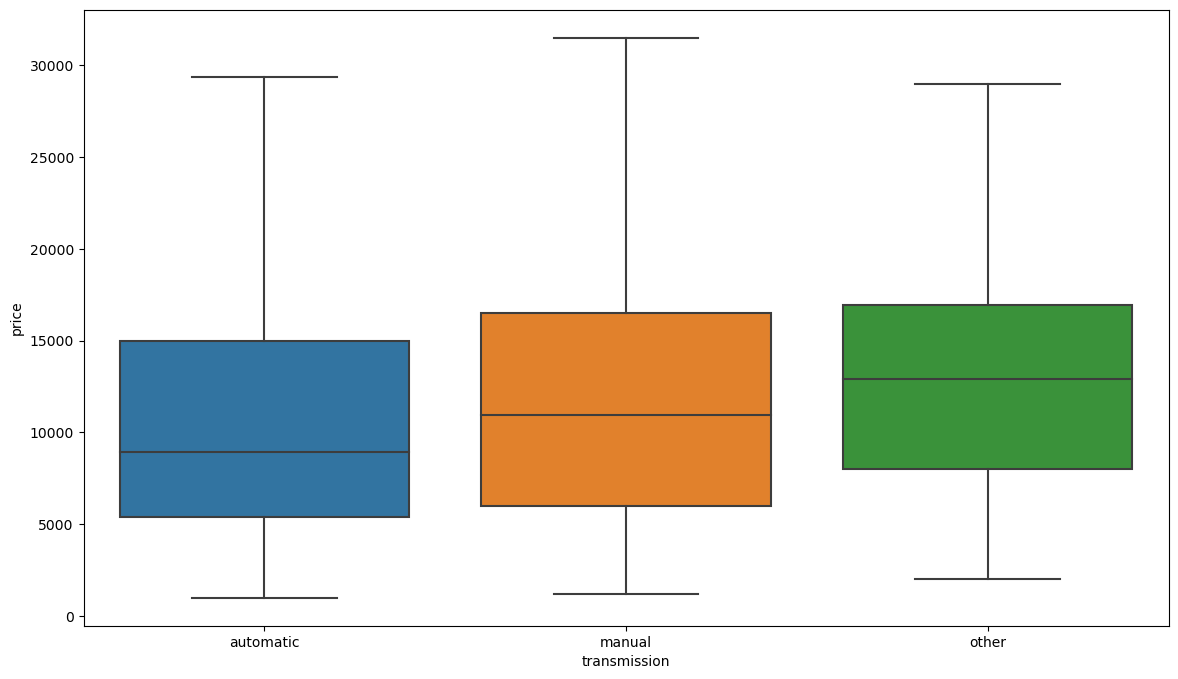

In [56]:
display(df_suv.groupby(['transmission'])['price'].describe())
plt.figure(figsize=(14,8))
sns.boxplot(x="transmission", y="price", data=df_suv, showfliers = False)
plt.show()

In SUV we see that price increase from automatic to manual and other. But it's not very strong correlation and we see that almost in all of transmissions median is in the middle of body of boxplot, so we near the normal distribution (skewed in the right, of course)

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,10912.0,7225.088160,4145.034519,1000.0,4000.0,6250.0,9495.0,40000.0
manual,561.0,5653.541889,3741.236391,1000.0,2999.0,4600.0,6995.0,25000.0
other,71.0,7835.084507,3812.641266,1988.0,5499.5,5999.0,10599.5,20700.0


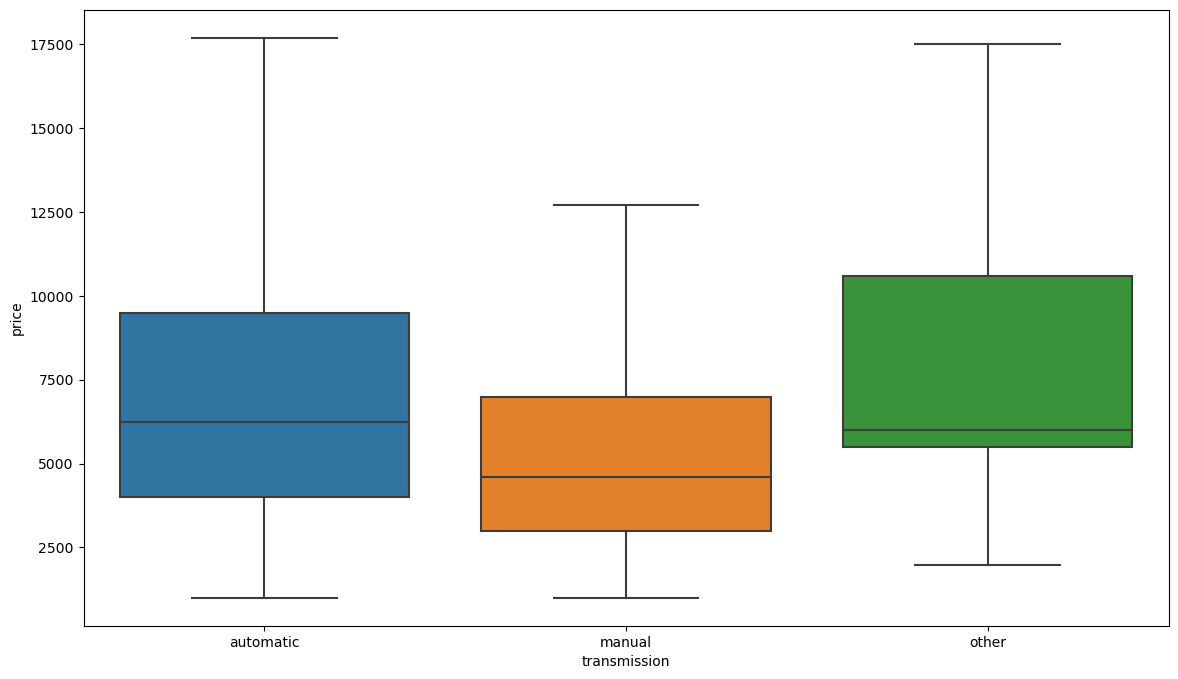

In [57]:
display(df_sedan.groupby(['transmission'])['price'].describe())
plt.figure(figsize=(14,8))
sns.boxplot(x="transmission", y="price", data=df_sedan, showfliers = False)
plt.show()

In Sedan group we see, that manual transmission has less price.

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,10972.0,16523.573642,9245.580009,1000.0,8995.0,15490.0,22822.5,43995.0
manual,416.0,10197.454327,7668.367843,1000.0,4200.0,8000.0,14500.0,42000.0
other,77.0,16505.155844,8276.302572,2788.0,9995.0,13995.0,23995.0,34995.0


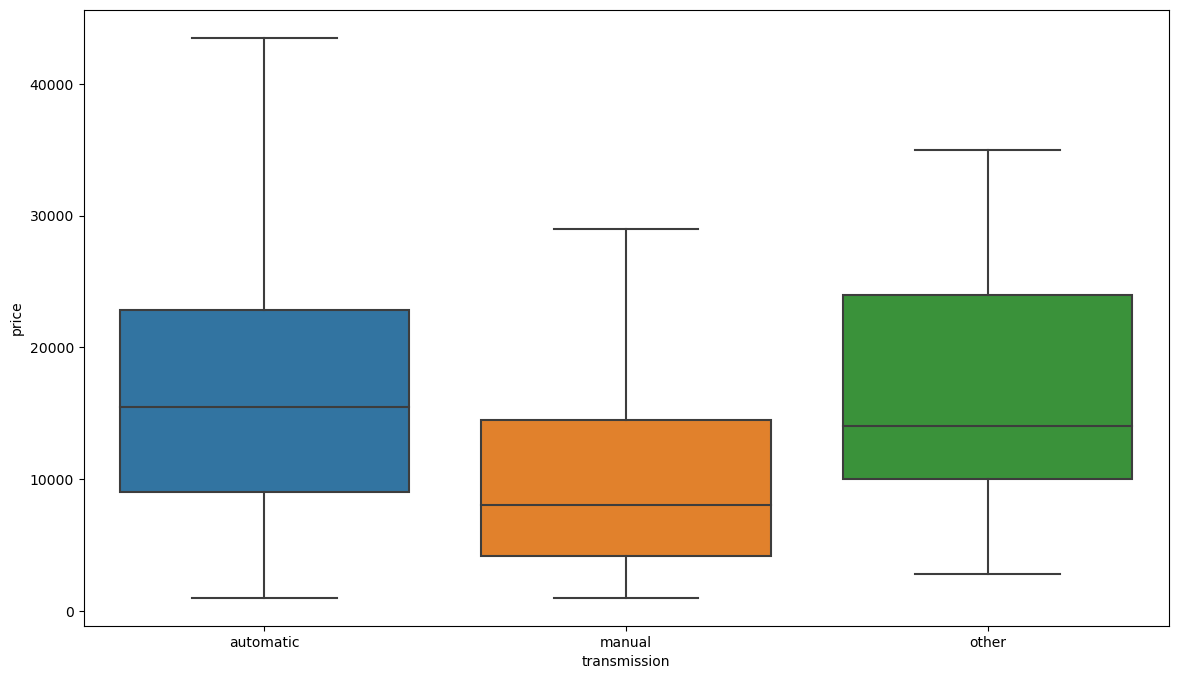

In [58]:
display(df_truck.groupby(['transmission'])['price'].describe())
plt.figure(figsize=(14,8))
sns.boxplot(x="transmission", y="price", data=df_truck, showfliers = False)
plt.show()

In truck group we also see, that manual transmission has less price.

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
orange,81.0,16315.172840,7900.245898,2599.0,11900.0,16900.0,18555.0,42995.0
black,2079.0,13237.930255,8727.045595,1000.0,6450.0,11850.0,16999.0,43900.0
white,1871.0,12186.106360,8356.023447,1000.0,5995.0,9950.0,16249.0,43675.0
unknown,2119.0,11355.807456,7983.852815,1000.0,5500.0,8995.0,14995.0,42995.0
grey,1138.0,11014.855888,7784.726671,1000.0,5225.0,8900.0,14798.0,39500.0
custom,281.0,10166.017794,6608.378060,1000.0,5700.0,8700.0,12990.0,41490.0
silver,1502.0,10229.561917,6647.159620,1000.0,5200.0,8495.0,13966.5,40995.0
red,869.0,10059.317606,7125.672405,1000.0,4650.0,7950.0,13990.0,40264.0
brown,361.0,8772.545706,6116.347828,1350.0,4000.0,7300.0,11995.0,38989.0


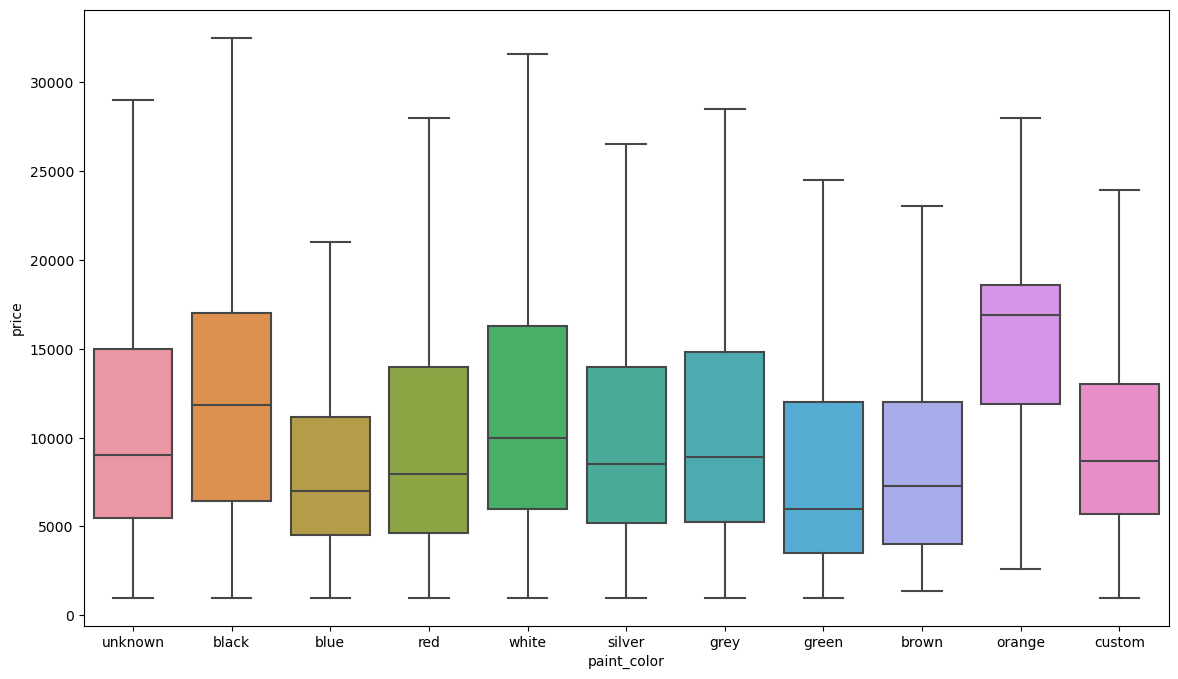

In [59]:
display(df_suv.groupby(['paint_color'])['price'].describe().sort_values(by='50%',ascending=False))
plt.figure(figsize=(14,8))
sns.boxplot(x="paint_color", y="price", data=df_suv, showfliers = False)
plt.show()

In SUV we have 2 favourites - black and orange. And nobody loves green and blue.

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
black,1694.0,7713.835891,4295.852576,1000.0,4495.0,6995.0,9997.00,40000.0
white,1428.0,7667.796218,4331.032249,1000.0,4500.0,6900.0,9995.00,31000.0
grey,1590.0,7141.153459,3883.034258,1000.0,4460.5,6372.5,8999.00,29777.0
unknown,2071.0,7201.795268,4175.345357,1000.0,3999.0,6200.0,9495.00,38997.0
red,892.0,7278.663677,4160.569232,1000.0,4250.0,6000.0,9499.25,25390.0
custom,261.0,7184.478927,4477.288609,1500.0,3995.0,5995.0,8999.00,33390.0
silver,1975.0,6966.200000,4030.442603,1000.0,3995.0,5995.0,8995.00,28000.0
blue,1179.0,6655.239186,4008.738600,1000.0,3950.0,5800.0,8500.00,25947.0
brown,253.0,5290.197628,3254.170023,1200.0,2995.0,4498.0,6950.00,22199.0


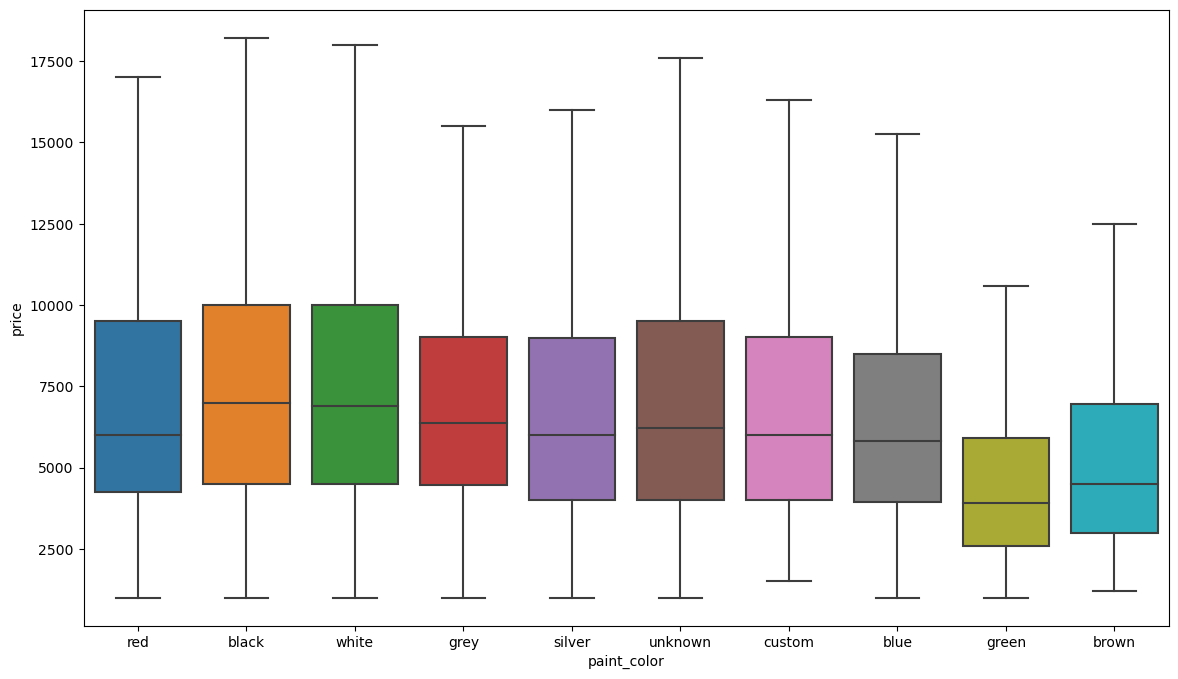

In [60]:
display(df_sedan.groupby(['paint_color'])['price'].describe().sort_values(by='50%',ascending=False))
plt.figure(figsize=(14,8))
sns.boxplot(x="paint_color", y="price", data=df_sedan, showfliers = False)
plt.show()

In sedan category price almost not depends from color, just green and brown have a lower mean.

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
black,1435.0,18435.308711,9882.952985,1000.0,9997.0,17995.0,25900.00,43990.0
yellow,66.0,15851.803030,6158.007138,1900.0,13747.5,17490.0,17490.00,34999.0
unknown,2007.0,16619.421026,9294.976466,1000.0,8992.5,15900.0,22990.00,43990.0
white,3443.0,16490.361894,9087.838706,1000.0,9547.5,15300.0,21900.00,43995.0
grey,909.0,17171.078108,9489.455965,1000.0,9650.0,14995.0,23500.00,43990.0
silver,960.0,15948.108333,8869.996799,1000.0,8988.0,14500.0,21689.25,43900.0
custom,291.0,15045.931271,8063.201260,1500.0,8422.5,14000.0,19990.00,41999.0
blue,841.0,15260.112961,8490.853755,1100.0,8950.0,13995.0,20997.00,41500.0
red,1015.0,14376.222660,9246.984875,1000.0,6900.0,12980.0,20495.00,42500.0


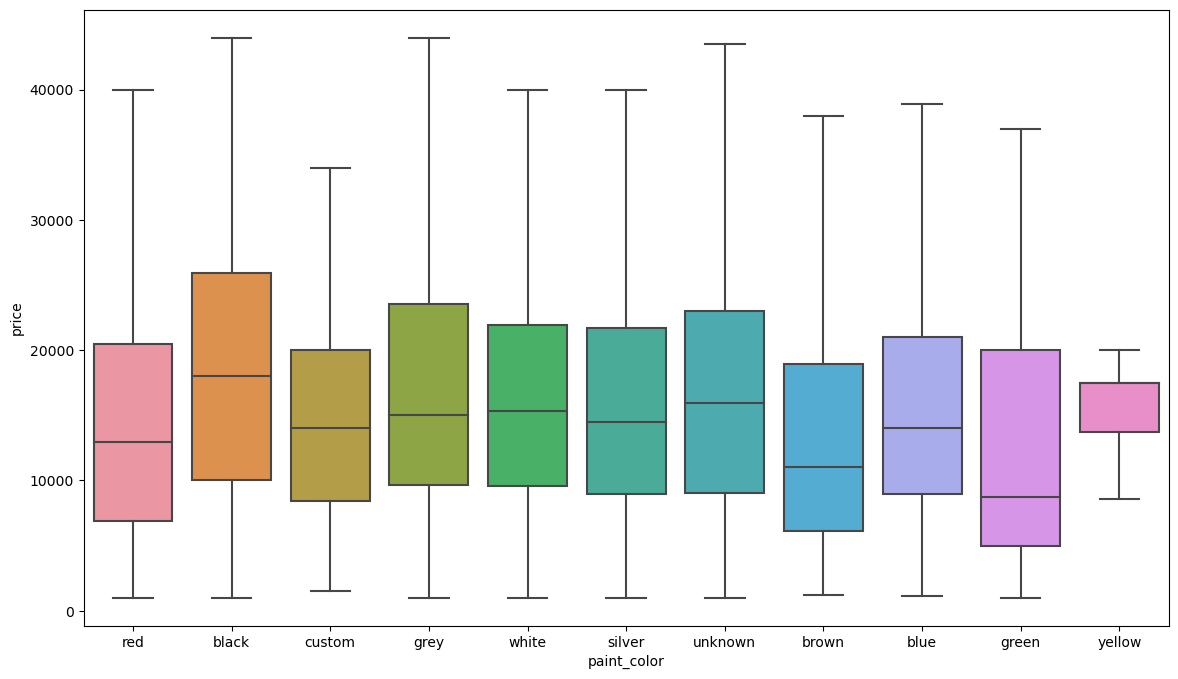

In [61]:
display(df_truck.groupby(['paint_color'])['price'].describe().sort_values(by='50%',ascending=False))
plt.figure(figsize=(14,8))
sns.boxplot(x="paint_color", y="price", data=df_truck, showfliers = False)
plt.show()

In truck we have red, brown and again green in outsiders.

## General conclusion

     In start we had not ideal data, so we needed to prepare it for analysis. I was forced to delete about 20% of the data because of missing values. We can't fill they in because these were missing values of specific individual data, such we couldn't restore. Then I removed the outliers because they were affecting the data. And then i tried to figure out what affects to price  with help of scatterplots, histograms and boxplots.
     
     Unfortunately I haven't got any amazing finds. Nevertheless we see on charts that younger vehicles with less odometer value have bigger price. Also, the automatic transmission affects the price increase (but not in SUV category, where people appreciate cars with manual transmittion more).
     
     We can also notice that the color of the vehicle affects the price. In all categories, the colors brown and green have the lowest median price. So if you want buy a car maybe more profitable will be to buy a green or brown car and to change color after.